# 5.3 - Improving Model Performance

* [5.3.1 - Tuning Key Gradient Descent Parameters](#first-bullet)
* [5.3.2 - Tuning Key Gradient Descent Parameters](#second-bullet)
* [5.3.3 - Increasing model capacity](#third-bullet)
* [5.4.4 - Regularizing your model](#fourth-bullet)

## 5.3.1 - Tuning Key Gradient Descent Parameters <a class="anchor" id="first-bullet"></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

We would like to achieve the following in a machine learning model:
* The model beats some common sense baseline, for example, what you would expect from a random guess.
* You can change the model to the point where the training data can be overfit.  If you cannot overfit the data, then you can make the assumption that you have underfit the model to the data. 

Let's start examining how the learning rate affects the model.  The learning rate in the model below is set to 1, and after 10 epochs we reach a training and validation accuracy of about 25 and cannot advance beyond that.  A random guess would predict an accuracy of about 10 percent, so while we have beating our common sense baseline there is room for improvement.

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

model = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 9ms/step - loss: 663.6815 - accuracy: 0.3894 - val_loss: 2.0253 - val_accuracy: 0.2743
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 4.1110 - accuracy: 0.2832 - val_loss: 6.6274 - val_accuracy: 0.2786
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 2.9570 - accuracy: 0.2903 - val_loss: 2.4983 - val_accuracy: 0.2677
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 3.1232 - accuracy: 0.2632 - val_loss: 2.1954 - val_accuracy: 0.2340
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 2.8289 - accuracy: 0.2631 - val_loss: 2.0951 - val_accuracy: 0.2545
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 2.6941 - accuracy: 0.2426 - val_loss: 2.2073 - val_accuracy: 0.2665
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 2.4702 - accuracy: 0.2750 - val_loss: 4.2502 - val_accuracy: 0.2974
Epoc

Instead, we will try a learning rate of 1e-2.

In [3]:
model = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3688 - accuracy: 0.9108 - val_loss: 0.2213 - val_accuracy: 0.9441
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.1411 - accuracy: 0.9626 - val_loss: 0.1427 - val_accuracy: 0.9677
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1127 - accuracy: 0.9720 - val_loss: 0.1889 - val_accuracy: 0.9658
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1023 - accuracy: 0.9778 - val_loss: 0.1649 - val_accuracy: 0.9699
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0845 - accuracy: 0.9825 - val_loss: 0.1870 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0804 - accuracy: 0.9843 - val_loss: 0.2420 - val_accuracy: 0.9673
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0675 - accuracy: 0.9871 - val_loss: 0.2453 - val_accuracy: 0.9718
Epoch

Much better!  If training takes a while to get started and appears to stall, try increasing the learning rate.  A learning rate that is too high might overshoot our parameter fit and not improve over time.

## 5.3.2 - Leveraging better architecture priors <a class="anchor" id="second-bullet"></a>

What happens when we have a model that can be trained on the training data set, but fails to generalize to the validation data set?

One of two things are probably happening.  The first is that the problem cannot be solved using the given data.  For example, you can achieve improvement on the MNIST digits training data with random labels because the model is essentially memorizing the training data.  The problem is that the model cannot generalize to the validation data set because there nothing about our model that would generalize to a validation set.

We may be using the wrong model architecture for our problem.  Most of our examples have used dense nerual networks for image classification.  Would a dense neural network be a good approach to text data?  Time series data?  Check to see if there is a standard way of approaching a given problem if the model can be trained, but does not generalize to unseen data.

## 5.3.3 - Increasing model capacity <a class="anchor" id="third-bullet"></a>

Once we generate a model that can be trained and has validation metrics that perform well, the next step is to see if the model can be overfitted.  Our goal is to get our model to be balanced between underfitting and overfitting, but we won't know where we currently stand with out model until we try to overfit it.

Below is a regression model of the MNIST digits data.

In [4]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.8340 - val_loss: 0.3588 - val_accuracy: 0.9040
Epoch 2/50
375/375 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.9032 - val_loss: 0.3085 - val_accuracy: 0.9145
Epoch 3/50
375/375 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.9124 - val_loss: 0.2918 - val_accuracy: 0.9176
Epoch 4/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9164 - val_loss: 0.2829 - val_accuracy: 0.9209
Epoch 5/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.9188 - val_loss: 0.2755 - val_accuracy: 0.9231
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.9204 - val_loss: 0.2733 - val_accuracy: 0.9244
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9218 - val_loss: 0.2704 - val_accuracy: 0.9245
Epoch 

Our plot of the validation loss shows that our model keeps improving, but we aren't clearly overfitting the model (at least according to the book).

It does appear that validation loss increases after about epoch 35, so we could argue that we are starting to overfit the model at this point.  The book's point is that we cannot overtrain because our original model is so simple.  Adding complexity with additional representational layers would allow us to overtrain the model.

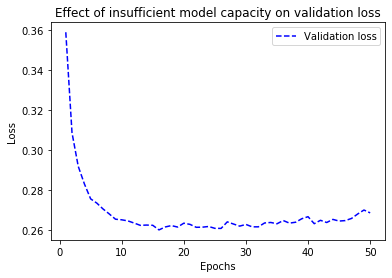

In [5]:
val_loss = history_small_model.history['val_loss']
epochs = range(1, 51)
plt.plot(epochs, val_loss, 'b--',
         label='Validation loss')
plt.title('Effect of insufficient model capacity on validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Same exercise, but we make our model more complex so we can get to the point of overfitting.

In [6]:
model = keras.Sequential([
  layers.Dense(96, activation='relu'),
  layers.Dense(96, activation='relu'),
  layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3606 - accuracy: 0.8986 - val_loss: 0.1987 - val_accuracy: 0.9393
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1572 - accuracy: 0.9538 - val_loss: 0.1317 - val_accuracy: 0.9607
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9678 - val_loss: 0.1185 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9746 - val_loss: 0.1061 - val_accuracy: 0.9695
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9787 - val_loss: 0.1036 - val_accuracy: 0.9714
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.1086 - val_accuracy: 0.9678
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.1056 - val_accuracy: 0.9707
Epoch 

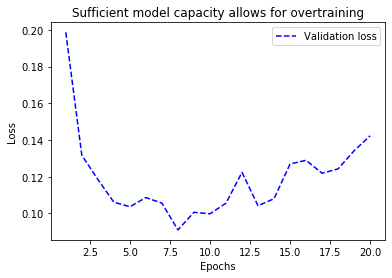

In [7]:
val_loss = history_large_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Validation loss')
plt.title('Sufficient model capacity allows for overtraining')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

We now have clear overfitting beyond approximately epoch 10.

## 5.4.4  Regularizing your model <a class="anchor" id="fourth-bullet"></a>

One way to prevent overfitting is to keep the model as simple as possible.  A simple model is less prone to overfitting, but may lack the capacity to be overfitted at all.  A complex model can be overfitted more easily.  

This is shown by comparing our original IMDB movie review classifier to a simplier model.

In [8]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_original = model.fit(train_data, train_labels,
                          epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 236ms/step - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.3852 - val_accuracy: 0.8684
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3052 - accuracy: 0.9041 - val_loss: 0.3093 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2238 - accuracy: 0.9291 - val_loss: 0.2782 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1756 - accuracy: 0.9442 - val_loss: 0.2777 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1421 - accuracy: 0.9551 - val_loss: 0.3070 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1198 - accuracy: 0.9643 - val_loss: 0.3173 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0985 - accuracy: 0.9717 - val_loss: 0.3240 - val_accuracy: 0.8817
Epoch 8/20
3

In [9]:
model = keras.Sequential([
  layers.Dense(4, activation='relu'),
  layers.Dense(4, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 107ms/step - loss: 0.5942 - accuracy: 0.7141 - val_loss: 0.5124 - val_accuracy: 0.8202
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4461 - accuracy: 0.8675 - val_loss: 0.4201 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3485 - accuracy: 0.9061 - val_loss: 0.3565 - val_accuracy: 0.8756
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2766 - accuracy: 0.9261 - val_loss: 0.3128 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2260 - accuracy: 0.9377 - val_loss: 0.2925 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1878 - accuracy: 0.9469 - val_loss: 0.2814 - val_accuracy: 0.8917
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1579 - accuracy: 0.9539 - val_loss: 0.2791 - val_accuracy: 0.8903
Epoch 8/20
3

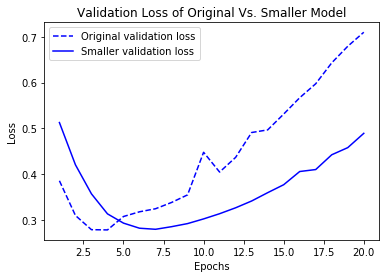

In [10]:
val_loss = hist_original.history['val_loss']
val_loss_sm = hist_smaller_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Original validation loss')
plt.plot(epochs, val_loss_sm, 'b',
         label='Smaller validation loss')
plt.title('Validation Loss of Original Vs. Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Our original model starts overtraining at about epoch 5.  The smaller, more simple model delays overtraining until about epoch 10.

What happens when we swing the other way and develop a model that's far more complicated than the task at hand calls for?  We start overfitting almost immediately.

In [11]:
model = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 243ms/step - loss: 0.5729 - accuracy: 0.7507 - val_loss: 0.3001 - val_accuracy: 0.8875
Epoch 2/20
30/30 [==============================] - 5s 181ms/step - loss: 0.2717 - accuracy: 0.9023 - val_loss: 0.3411 - val_accuracy: 0.8548
Epoch 3/20
30/30 [==============================] - 5s 172ms/step - loss: 0.1636 - accuracy: 0.9449 - val_loss: 0.3795 - val_accuracy: 0.8540
Epoch 4/20
30/30 [==============================] - 5s 168ms/step - loss: 0.0990 - accuracy: 0.9700 - val_loss: 0.3442 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 5s 175ms/step - loss: 0.1152 - accuracy: 0.9755 - val_loss: 0.3336 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 5s 176ms/step - loss: 0.0063 - accuracy: 0.9995 - val_loss: 0.4840 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 5s 166ms/step - loss: 9.6224e-04 - accuracy: 0.9999 - val_loss: 0.6067 - val_accuracy: 0.8870
Ep

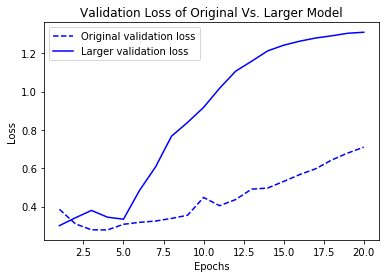

In [12]:
val_loss = hist_original.history['val_loss']
val_loss_lg = hist_larger_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Original validation loss')
plt.plot(epochs, val_loss_lg, 'b',
         label='Larger validation loss')
plt.title('Validation Loss of Original Vs. Larger Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

When can also use L1 and L2 regularization to regularize our model.  In essence, a penalty is added to the model if the model weights grow too large.

From Deep Learning with Python (Second Edition):
* **L1 regularization**  — The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
* **L2 regularization**  — The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization.

Here's what happens when we add L2 regularization to our original model:

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
  layers.Dense(16,
               kernel_regularizer=regularizers.l2(0.002),
               activation='relu'),
  layers.Dense(16,
               kernel_regularizer=regularizers.l2(0.002),
               activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 105ms/step - loss: 0.6596 - accuracy: 0.6912 - val_loss: 0.5663 - val_accuracy: 0.8314
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4968 - accuracy: 0.8646 - val_loss: 0.4567 - val_accuracy: 0.8726
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3921 - accuracy: 0.9036 - val_loss: 0.3966 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3315 - accuracy: 0.9198 - val_loss: 0.3820 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2998 - accuracy: 0.9292 - val_loss: 0.3620 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2777 - accuracy: 0.9355 - val_loss: 0.3601 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2621 - accuracy: 0.9405 - val_loss: 0.3752 - val_accuracy: 0.8804
Epoch 8/20
3

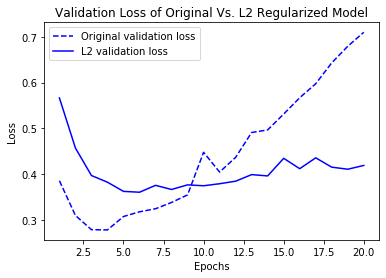

In [14]:
val_loss = hist_original.history['val_loss']
val_loss_l2 = hist_l2_reg.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Original validation loss')
plt.plot(epochs, val_loss_l2, 'b',
         label='L2 validation loss')
plt.title('Validation Loss of Original Vs. L2 Regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

We can also regularize our model using Dropout, which will deactivate random neurons 

In [15]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 102ms/step - loss: 0.6107 - accuracy: 0.6702 - val_loss: 0.4814 - val_accuracy: 0.8566
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4938 - accuracy: 0.7770 - val_loss: 0.3988 - val_accuracy: 0.8650
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4123 - accuracy: 0.8327 - val_loss: 0.3362 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3533 - accuracy: 0.8685 - val_loss: 0.3051 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3133 - accuracy: 0.8889 - val_loss: 0.2765 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2756 - accuracy: 0.9045 - val_loss: 0.2732 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2455 - accuracy: 0.9198 - val_loss: 0.2802 - val_accuracy: 0.8885
Epoch 8/20
3

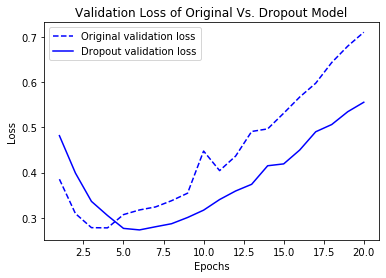

In [16]:
val_loss = hist_original.history['val_loss']
val_loss_do = hist_dropout.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss, 'b--',
         label='Original validation loss')
plt.plot(epochs, val_loss_do, 'b',
         label='Dropout validation loss')
plt.title('Validation Loss of Original Vs. Dropout Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()